(83, 565, 3)


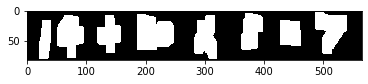

(80, 230, 3)


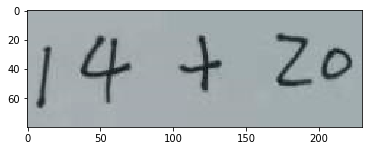

transform image size -->torch.Size([1, 3, 32, 92])
torch.Size([1, 3, 32, 92])
tensor([ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        26,  0,  0,  0,  0,  0])
words --> az


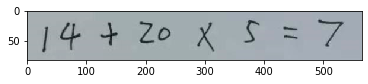

In [226]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from lib.crnn import CRNNClassify
from torch.autograd import Variable
import lib.dataset as dataset
import lib.utils as utils
import time
import importlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import lib.image_utils as img_utils
importlib.reload(dataset)
importlib.reload(utils)
importlib.reload(img_utils)

path = '/project'
alpha = 'abcdefghijklmnopqrstuvwxyz'
# alpha = '0123456789+-÷×=)('
# alpha = '0123456789.'
converter = utils.strLabelConverter(alpha)

net = torch.load('{}/acrnn_best.pkl'.format(path),map_location=torch.device('cpu'))
# image = cv2.imread('{}/data/images/111182_ChineseHWA.png'.format(path), cv2.IMREAD_COLOR)
image = cv2.imread('{}/data/test/mh_1.png'.format(path), cv2.IMREAD_COLOR)
source_image = image.copy()
print(image.shape)
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
x1,y1,x2,y2 = img_utils.detect_char_area(image_gray.copy(),min_area=80)
image = image[y1:y2,x1:x2]
print(image.shape)
# image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image,'gray')
plt.show()



transformer = dataset.resizeLocalNormalize(imgH=32, keep_ratio=True)
# origin_image = image.copy()
image = transformer(image)
image = image.unsqueeze(0)
print('transform image size -->{}'.format(image.size()))
image = Variable(image)
# image = image.cuda()


print(image.size())
output = net(image)
_,preds = output.max(2)
preds = preds.squeeze(-2)
preds = preds.view(-1)
print(preds)
preds_size = Variable(torch.IntTensor([preds.size(0)]))
words = converter.decode(preds.data, preds_size, raw=False)
print('words -->', words)

plt.imshow(source_image,'gray')
plt.show()
